In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
csv_path = "/workspaces/computational_methods_course/data/moores.csv"

ds = pd.read_csv(csv_path, skiprows=1)

# ds

In [3]:
years = ds['Year'].to_numpy().reshape(-1,1)
# years

In [4]:
trans_count = ds['Transistor Count'].to_numpy()
trans_list = []
for i in trans_count:
    if "-" in i:
        l = np.mean([int(x) for x in i.split('-')])
        trans_list.append(l)
    else:
        trans_list.append(i)
trans_count = np.array(trans_list, dtype=int)

ds['Transistor Count'] = trans_count


# trans_count

In [5]:
log_trans_count = np.log10(trans_count)

# log_trans_count

In [6]:
model = LinearRegression()

model_all = model.fit(years, log_trans_count)
score = model_all.score(years, log_trans_count)
intercept = model_all.intercept_
slope = model_all.coef_[0]


vals = np.array([score, intercept, slope])
# vals

In [7]:
trans_predict = 10 ** model_all.predict(years)  # Convvert from Log Space back to predicted "Real" counts
# trans_predict

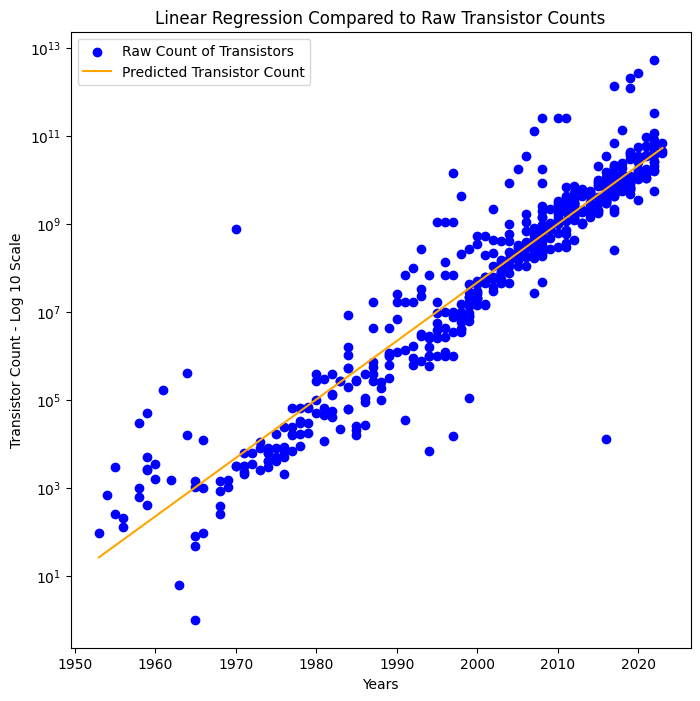

To Calculate the Doubling Time of an Exponential Curve just divide Log(2) by the 
linear regression's Slope. Thus our doubling time is:
2.2641950230790053 years
Comparing the model value to the citied value of every 2 years, shows 2 to be a good estimate for the Doubling Time.
As the difference is only: 0.26419502307900533 or a precentage of: 12.39131989269293
Using the second proposed value of every 5 years would be a bad estimate for this data as
the difference would be: -2.7358049769209947 or a percentage of: -75.32300463379892


In [ ]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(years, trans_count, color='Blue', label="Raw Count of Transistors")
plt.plot(years, trans_predict, color='Orange', label="Predicted Transistor Count")

plt.title("Linear Regression Compared to Raw Transistor Counts")
plt.xlabel('Years - Linear Scale')
plt.ylabel('Transistor Count - Log 10 Scale')

plt.xlabel('Years')
plt.yscale('log')


plt.legend()
plt.show()

# Results for All Years

DT = np.log10(2)/slope

print(f"To Calculate the Doubling Time of an Exponential Curve just divide Log(2) by the \nlinear regression's Slope. Thus our doubling time is:\n{DT} years")
print(f'Comparing the model value to the citied value of every 2 years, shows 2 to be a GOOD estimate for the Doubling Time.\nAs the difference is only: {abs(DT-2)} or a precentage: {(abs(DT-2))/np.mean([2, DT]) * 100}')
print(f"Using the second proposed value of every 5 years would be a BAD estimate for this data as\nthe difference would be: {abs(DT-5)} or a percentage: {(abs(DT-5))/np.mean([5, DT]) * 100}")

In [ ]:
# First 10 years only
f10_year_lim = years.min() + 10
f10_ds = ds[ds['Year'] <= f10_year_lim].shape


(508, 7)
(19, 7)


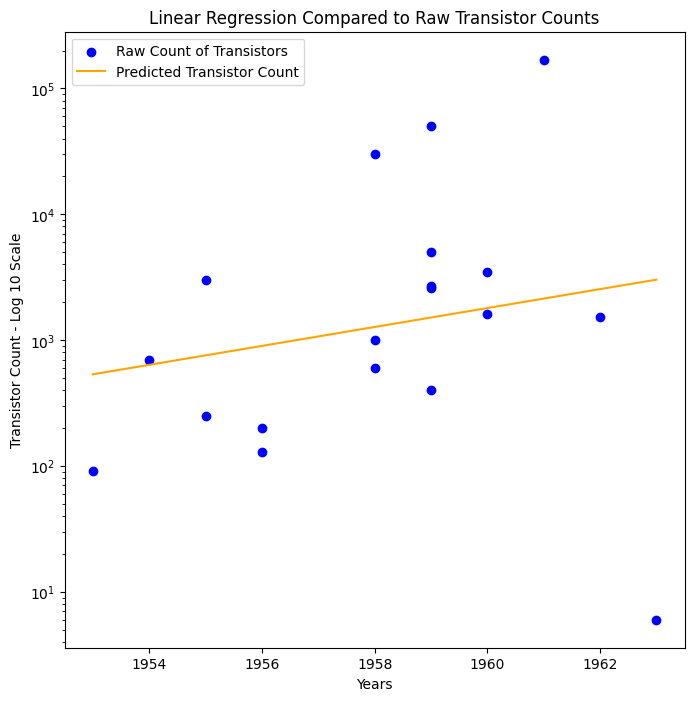

The doubling time for the first 10 years is:
4.001552448611063 years
Comparing the model value to the citied value of every 2 years, shows 2 to be a BAD estimate for the Doubling Time.
As the difference is: 2.001552448611063 or a precentage: 66.70115660071527
Using the second proposed value of every 5 years would be a BETTER estimate for this data as
the difference would be: 0.9984475513889368 or a percentage of: 22.18389676867343


In [ ]:
# First 10 years only
f10_year_lim = years.min() + 10
f10_ds = ds[ds['Year'] <= f10_year_lim]

f10_years = f10_ds['Year'].to_numpy().reshape(-1,1)
f10_trans_count = f10_ds['Transistor Count'].to_numpy()


f10_log_trans_count = np.log10(f10_trans_count)

f10_model = model.fit(f10_years, f10_log_trans_count)
score = f10_model.score(f10_years, f10_log_trans_count)
intercept = f10_model.intercept_
slope = f10_model.coef_[0]

f10_vals = np.array([score, intercept, slope])

f10_trans_predict = 10 ** f10_model.predict(f10_years)  # Convvert from Log Space back to predicted "Real" counts


fig = plt.figure(figsize=(8, 8))

plt.scatter(f10_years, f10_trans_count, color='Blue', label="Raw Count of Transistors")
plt.plot(f10_years, f10_trans_predict, color='Orange', label="Predicted Transistor Count")

plt.title("Linear Regression Compared to Raw Transistor Counts")
plt.xlabel('Years - Linear Scale')
plt.ylabel('Transistor Count - Log 10 Scale')

plt.xlabel('Years')
plt.yscale('log')


plt.legend()
plt.show()


DT = np.log10(2)/slope

print(f"The doubling time for the first 10 years is:\n{DT} years")
print(f'Comparing the model value to the citied value of every 2 years, shows 2 to be a BAD estimate for the Doubling Time.\nAs the difference is: {abs(DT-2)} or a precentage: {(abs(DT-2))/np.mean([2, DT]) * 100}')
print(f"Using the second proposed value of every 5 years would be a BETTER estimate for this data as\nthe difference would be: {abs(DT-5)} or a percentage: {(abs(DT-5))/np.mean([5, DT]) * 100}")


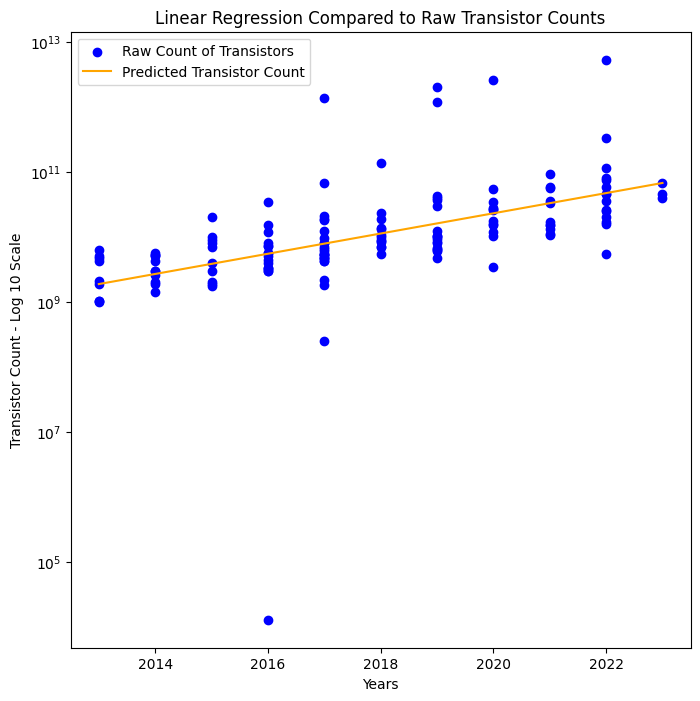

The doubling time for the first 10 years is:
1.934911446973171 years
Comparing the model value to the citied value of every 2 years, shows 2 to be a GOOD estimate for the Doubling Time.
As the difference is only: 0.06508855302682903 or a precentage: 3.3082601173602884
Using the second proposed value of every 5 years would be a BAD estimate for this data as
the difference would be: 3.065088553026829 or a percentage: 88.39589593792508


In [27]:
# Last 10 years only
f10_year_lim = years.max() - 10
f10_ds = ds[ds['Year'] >= f10_year_lim]

f10_years = f10_ds['Year'].to_numpy().reshape(-1,1)
f10_trans_count = f10_ds['Transistor Count'].to_numpy()



f10_log_trans_count = np.log10(f10_trans_count)

f10_model = model.fit(f10_years, f10_log_trans_count)
score = f10_model.score(f10_years, f10_log_trans_count)
intercept = f10_model.intercept_
slope = f10_model.coef_[0]

f10_vals = np.array([score, intercept, slope])

f10_trans_predict = 10 ** f10_model.predict(f10_years)  # Convvert from Log Space back to predicted "Real" counts


fig = plt.figure(figsize=(8, 8))

plt.scatter(f10_years, f10_trans_count, color='Blue', label="Raw Count of Transistors")
plt.plot(f10_years, f10_trans_predict, color='Orange', label="Predicted Transistor Count")

plt.title("Linear Regression Compared to Raw Transistor Counts")
plt.xlabel('Years - Linear Scale')
plt.ylabel('Transistor Count - Log 10 Scale')

plt.xlabel('Years')
plt.yscale('log')


plt.legend()
plt.show()


DT = np.log10(2)/slope

print(f"The doubling time for the first 10 years is:\n{DT} years")
print(f'Comparing the model value to the citied value of every 2 years, shows 2 to be a GOOD estimate for the Doubling Time.\nAs the difference is only: {abs(DT-2)} or a precentage: {(abs(DT-2))/np.mean([2, DT]) * 100}')
print(f"Using the second proposed value of every 5 years would be a BAD estimate for this data as\nthe difference would be: {abs(DT-5)} or a percentage: {(abs(DT-5))/np.mean([5, DT]) * 100}")

Thus from these findings we can see that Moore's Law has changed over time. Being initally slower, arround 5 years for the 10 years, then increasing the doubling time up to around 2 years by the last 10 years of data.